In [1]:
import numpy as np
import pandas as pd 

In [2]:
# To read the file
data = pd.read_csv(r'C:\Users\Kavya\OneDrive\Documents\Data sets\Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Dimensionality Reduction using PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
import matplotlib.pyplot as plt

In [10]:
wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

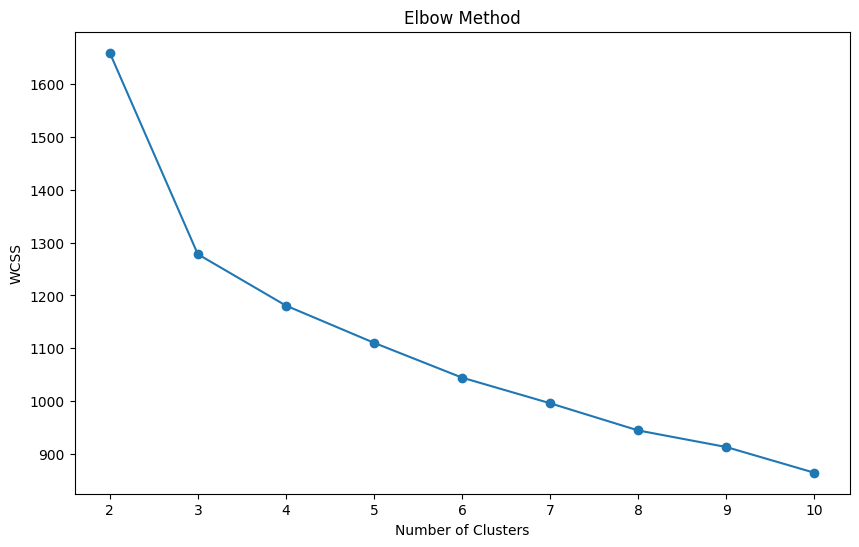

In [11]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(2,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [13]:
# Adding cluster labels to the dataset
data['Cluster'] = y_kmeans
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


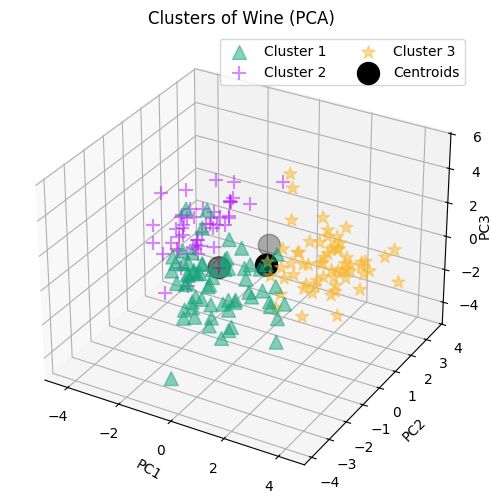

In [14]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection = '3d')
ax.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], X_pca[y_kmeans == 0, 2], s = 100, c = '#16A37A', label = 'Cluster 1', alpha = 0.5, marker='^')
ax.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], X_pca[y_kmeans == 1, 2], s = 100, c = '#B319FA', label = 'Cluster 2', alpha = 0.5, marker='+')
ax.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], X_pca[y_kmeans == 2, 2], s = 100, c = '#FAB832', label = 'Cluster 3', alpha = 0.5, marker='*')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 250, c = 'black', label = 'Centroids')

ax.set_xlabel('PC1', rotation=-30)
ax.set_ylabel('PC2', rotation=45)
ax.set_zlabel('PC3', rotation=90)
ax.zaxis.labelpad = -4
plt.legend(bbox_to_anchor = (1.0, 1.0), ncol = 2)
plt.title("Clusters of Wine (PCA)")
plt.show()

# Silhouette Score

In [15]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.2848589191898987


# Agglomerative Hierarchical Clustering

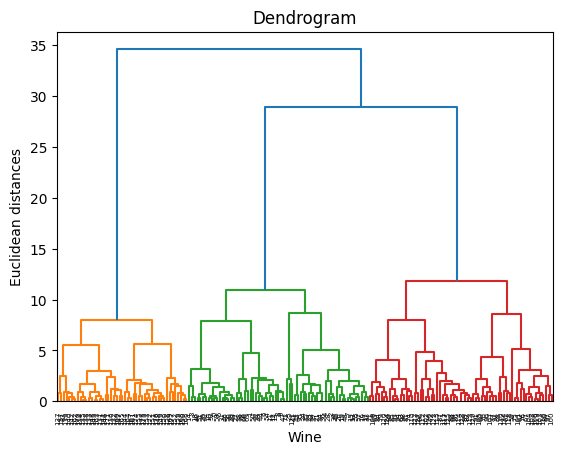

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean distances')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, 
                             metric = 'euclidean',
                             linkage = 'ward')

y_hc = hc.fit_predict(X)

In [18]:
agg_silhouette_score = silhouette_score(X,y_hc)

In [19]:
print(agg_silhouette_score)

0.2774439826952265


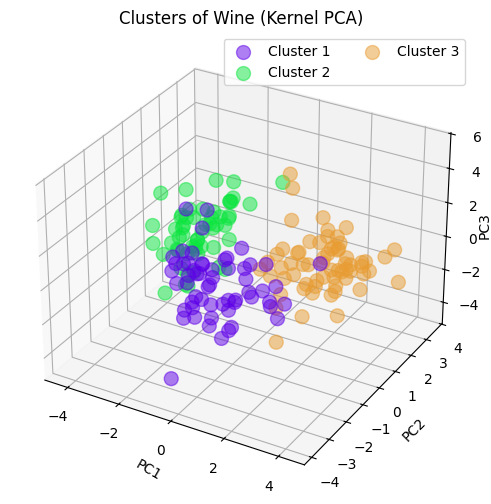

In [20]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection = '3d')
ax.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], X_pca[y_hc == 0, 2], s = 100, c = '#5E00E8', label = 'Cluster 1', alpha = 0.5)
ax.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], X_pca[y_hc == 1, 2], s = 100, c = '#0CE53F', label = 'Cluster 2', alpha = 0.5)
ax.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], X_pca[y_hc == 2, 2], s = 100, c = '#E89C31', label = 'Cluster 3', alpha = 0.5)

ax.set_xlabel('PC1', rotation = -30)
ax.set_ylabel('PC2', rotation = 45)
ax.set_zlabel('PC3', rotation = 90)
ax.zaxis.labelpad = -4
plt.legend(bbox_to_anchor = (1.0, 1.0), ncol = 2)
plt.title("Clusters of Wine (Kernel PCA)")
plt.show()

# DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)
labels = db.labels_

In [22]:
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

In [23]:
# Calculate the silhouette score only if there are more than 1 cluster
if n_clusters > 1:
    # Calculate the silhouette score
    s_score = silhouette_score(X, labels)
    print(f"Silhouette Score for DBSCAN: {s_score}")
else:
    print(f"DBSCAN with eps={db.eps}, min_samples={db.min_samples} resulted in only {n_clusters} cluster(s). Silhouette score is not applicable.")

DBSCAN with eps=0.3, min_samples=10 resulted in only 1 cluster(s). Silhouette score is not applicable.
